# Zestaw zadań: Rozwiązywanie równań nieliniowych
## Zadanie 2
### Autor: Artur Gęsiarz

In [325]:
import numpy as np
import matplotlib.pyplot as plt

### Dane rownanie

In [326]:
def f(x):
    return x ** 2 - 3 * x + 2

### Schematy iteracyjne

In [327]:
def g1(x):
    return (x ** 2 + 2) / 3

In [328]:
def g2(x):
    return np.sqrt(3 * x - 2)

In [329]:
def g3(x):
    return 3 - 2 / x

In [330]:
def g4(x):
    return (x ** 2 - 2) / (2 * x - 3)

### Pochodne schematow iteracyjnych

In [331]:
def g1_prime(x):
    return 2 * x / 3

In [332]:
def g2_prime(x):
    return 3 / (2 * np.sqrt(3 * x - 2))

In [333]:
def g3_prime(x):
    return 2 / x ** 2

In [334]:
def g4_prime(x):
    return 2 * (x ** 2 - 3 * x + 2) / (2 * x - 3) ** 2

### Badanie zbieznosci oraz rzedu schematu iteracyjnego odpowiadajacych funkcja $g_i(x)$ dla pierwiastka $x = 2$ badajac $| g_i'(2)|$

In [335]:
x_value = 2

derivatives = {
    'g1': np.abs(g1_prime(x_value)),
    'g2': np.abs(g2_prime(x_value)),
    'g3': np.abs(g3_prime(x_value)),
    'g4': np.abs(g4_prime(x_value))
}

### Analiza zbieznosci

In [336]:
for name, der in derivatives.items():
    if der < 1:
        print(f"Funkcja {name}(x) jest zbieżna.")
    else:
        print(f"Funkcja {name}(x) jest rozbieżna.")
    print("\n")

Funkcja g1(x) jest rozbieżna.


Funkcja g2(x) jest zbieżna.


Funkcja g3(x) jest zbieżna.


Funkcja g4(x) jest zbieżna.




### Potwierdzenie analizy teoretycznej - weryfikujac ich zbieznosc lub brak

#### Z analizy teoretycznej wychodzi ze zbieznymi są tylko funkcje: $g_2(x), g_3(x), g_4(x)$

In [337]:
def iterate(g,x_0,exact_value = 2, n = 10):
    x = x_0
    errors = []

    for i in range(n):
        x = g(x)
        error = np.abs(x - exact_value)
        errors.append(error)
        print(f"Iteracja {i+1}: x = {x}, błąd = {error}")

    return errors

In [338]:
# Poczatkowa wartosc x
x0 = 1.51

# Wykonanie iteracji dla każdego schematu iteracyjnego
print("Schemat iteracyjny g1(x):")
errors_g1 = iterate(g1, x0)

print("\nSchemat iteracyjny g2(x):")
errors_g2 = iterate(g2, x0)

print("\nSchemat iteracyjny g3(x):")
errors_g3 = iterate(g3, x0)

print("\nSchemat iteracyjny g4(x):")
errors_g4 = iterate(g4, x0)


Schemat iteracyjny g1(x):
Iteracja 1: x = 1.4267, błąd = 0.5732999999999999
Iteracja 2: x = 1.34515763, błąd = 0.6548423699999999
Iteracja 3: x = 1.2698163498490722, błąd = 0.7301836501509278
Iteracja 4: x = 1.2041445207813404, błąd = 0.7958554792186596
Iteracja 5: x = 1.1499880089759078, błąd = 0.8500119910240922
Iteracja 6: x = 1.1074908069294576, błąd = 0.8925091930705424
Iteracja 7: x = 1.0755119624777538, błąd = 0.9244880375222462
Iteracja 8: x = 1.0522419938109164, błąd = 0.9477580061890836
Iteracja 9: x = 1.035737737846391, błąd = 0.964262262153609
Iteracja 10: x = 1.0242508871997198, błąd = 0.9757491128002802

Schemat iteracyjny g2(x):
Iteracja 1: x = 1.5905973720586868, błąd = 0.4094026279413132
Iteracja 2: x = 1.6648699997825838, błąd = 0.33513000021741624
Iteracja 3: x = 1.73049414889151, błąd = 0.26950585110849
Iteracja 4: x = 1.7864720671408578, błąd = 0.21352793285914218
Iteracja 5: x = 1.8328710269472244, błąd = 0.16712897305277563
Iteracja 6: x = 1.870457986922367, błąd

### Wyznaczenie eksperymentalne rzędu zbieżnosci kazdej metody ze wzoru
### $ r = ln(e_k / e_{k+1} ) / ln( e_{k-1} /  e_k )  $

### Funkcja do obliczenia rzedu zbieznosci

In [339]:
def calculate_convergence_order(errors):
    orders = []
    for k in range(1, len(errors) - 1):
        order = np.log(errors[k] / errors[k+1]) / np.log(errors[k-1] / errors[k])
        orders.append(order)
    return orders

### Wyznaczenie zbieznosci

In [340]:
orders_g1 = calculate_convergence_order(errors_g1)
orders_g2 = calculate_convergence_order(errors_g2)
orders_g3 = calculate_convergence_order(errors_g3)
orders_g4 = calculate_convergence_order(errors_g4)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_84843/1742065990.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  order = np.log(errors[k] / errors[k+1]) / np.log(errors[k-1] / errors[k])


In [341]:
print("\nRzędy zbieżności:")
print(f"g2(x): {orders_g2[-1]}. \n")
print(f"g3(x): {orders_g3[-1]}. \n")
print(f"g4(x): {orders_g4[:-1][-1]}. \n")


Rzędy zbieżności:
g2(x): 1.0129918626655086. 

g3(x): 1.0013515845338752. 

g4(x): 1.9976840547523653. 



### Wykres błedu wzglednego dla kazdej metody w zaleznosci od numery iteracji

In [342]:
iterations = 10

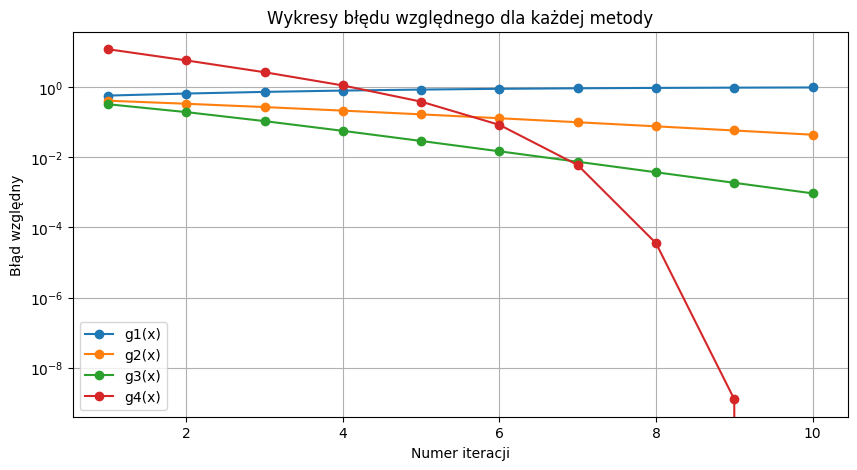

In [343]:
plt.figure(figsize=(10, 5))
plt.semilogy(range(1, iterations+1), errors_g1, marker='o', label='g1(x)')
plt.semilogy(range(1, iterations+1), errors_g2, marker='o', label='g2(x)')
plt.semilogy(range(1, iterations+1), errors_g3, marker='o', label='g3(x)')
plt.semilogy(range(1, iterations+1), errors_g4, marker='o', label='g4(x)')
plt.title('Wykresy błędu względnego dla każdej metody')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Wykres bledu wzglednego, ale tylko dla metod zbieznych

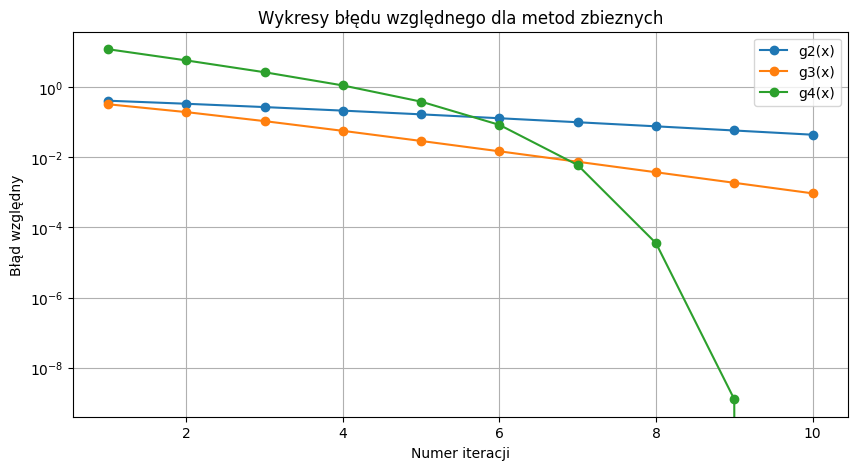

In [344]:
plt.figure(figsize=(10, 5))
plt.semilogy(range(1, iterations+1), errors_g2, marker='o', label='g2(x)')
plt.semilogy(range(1, iterations+1), errors_g3, marker='o', label='g3(x)')
plt.semilogy(range(1, iterations+1), errors_g4, marker='o', label='g4(x)')
plt.title('Wykresy błędu względnego dla metod zbieznych')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()